In [1]:
# Setup
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Make sure that caffe is on the python path
caffe_root = '/home/ubuntu/caffe/'
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

model_prototxt = 'deploy.prototxt'
pretrained_model = os.path.join(caffe_root,'models/bvlc_alexnet/bvlc_alexnet.caffemodel')

caffe.set_mode_cpu()
net = caffe.Classifier(model_prototxt, pretrained_model,
                       mean=np.load(os.path.join(caffe_root,'python/caffe/imagenet/ilsvrc_2012_mean.npy')).mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

/home/ubuntu/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/ubuntu/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/ubuntu/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


Sanity check just to see if everything is set up properly.

In [2]:
image_file = 'cat.jpg'
input_image = caffe.io.load_image(image_file)
prediction = net.predict([input_image])
print("Predicted class is #{}.".format(prediction[0].argmax()))

# load labels
imagenet_labels_filename = os.path.join(caffe_root,'data/ilsvrc12/synset_words.txt')
try:
    labels = np.loadtxt(imagenet_labels_filename, str, delimiter='\t')
except:
    !../data/ilsvrc12/get_ilsvrc_aux.sh
    labels = np.loadtxt(imagenet_labels_filename, str, delimiter='\t')

# sort top k predictions from softmax output
top_k = prediction[0].flatten().argsort()[-1:-6:-1]
print labels[top_k]

Predicted class is #285.
['n02124075 Egyptian cat' 'n02123045 tabby, tabby cat'
 'n02123159 tiger cat' 'n02127052 lynx, catamount'
 'n02120505 grey fox, gray fox, Urocyon cinereoargenteus']


Here, we set the number of iterations, desired label, learning rate and the randomly generated image that we start with.

In [3]:
n_iterations = 250
input_data = np.random.random((1,3,227,227))
label_index = 281 # cat. 99: goose, 285: cat, 543: dumbbell
label = np.zeros((1,1,1,1000))
label[0,0,0,label_index] = 1;
learning_rate = 10000

Iteratively perform gradient ascent over input image space to generate visualization.

In [4]:
for i in range(n_iterations):
    # Perform forward pass
    forwardOutput = net.forward(data=input_data)
    
    # Perform backward pass for the desired class
    bw = net.backward(**{net.outputs[0]: label})
    
    # Perform gradient ascent over the input image    
    diff = bw['data']
    input_data = input_data + learning_rate * diff
    
    if i%20 == 0:
        print("Iteration #{}.".format(i))

print 'Done'

Iteration #0.
Iteration #20.
Iteration #40.
Iteration #60.
Iteration #80.
Iteration #100.
Iteration #120.
Iteration #140.
Iteration #160.
Iteration #180.
Iteration #200.
Iteration #220.
Iteration #240.
Done


Normalize and view the class model visualization.

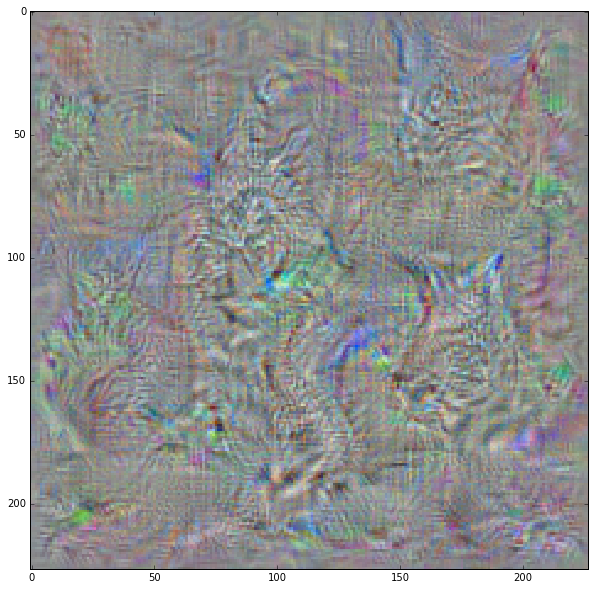

In [5]:
data = input_data[0].transpose(1,2,0)
data -= data.min()
data /= data.max()
plt.imshow(data)